
 Sample of dataset:
    Feature     Target
0  0.931280  56.733566
1  0.087047 -16.914625
2 -1.057711 -30.302579
3  0.314247   9.231600
4 -0.479174 -16.606936

 SKLEARN LINEAR REGRESSION RESULTS
Intercept (b0): 1.5435427037993907
Coefficient (b1): 45.815803822578005
Mean Squared Error: 165.857
R² Score: 0.826


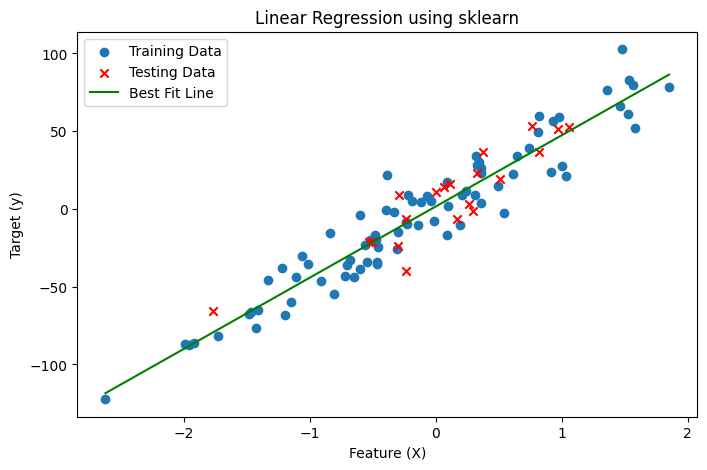


 GRADIENT DESCENT RESULTS
θ0 (Intercept): 1.5435427037881668
θ1 (Coefficient): 45.81580382224473
Mean Squared Error (GD): 165.857
R² Score (GD): 0.826


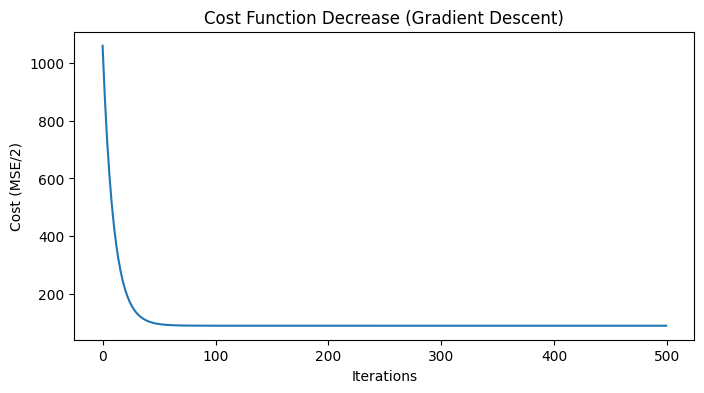

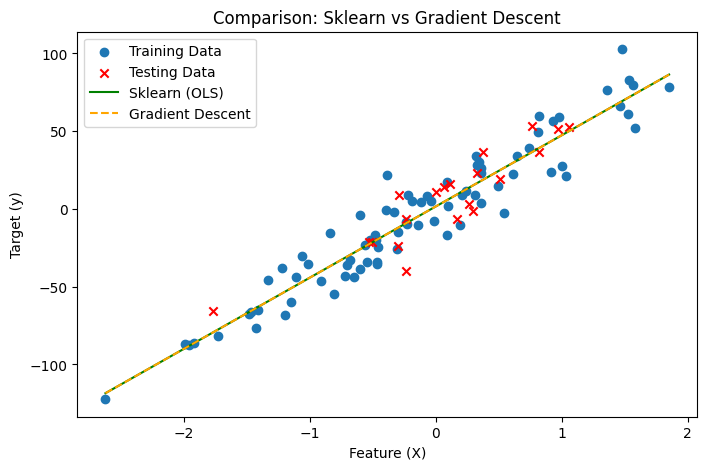

In [ ]:

# LINEAR REGRESSION - STEP BY STEP PRACTICAL (Regression)

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------------
# STEP 1: Create a simple dataset
# ------------------------------
# Create a regression dataset with noise for realism
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Convert to pandas DataFrame (for better visualization)
df = pd.DataFrame({"Feature": X.flatten(), "Target": y})
print("\n Sample of dataset:")
print(df.head())

# ------------------------------
# STEP 2: Split the data
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# ------------------------------
# STEP 3: Train using sklearn LinearRegression
# ------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n SKLEARN LINEAR REGRESSION RESULTS")
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])
print("Mean Squared Error:", round(mse, 3))
print("R² Score:", round(r2, 3))

# ------------------------------
# STEP 4: Plot actual data and regression line
# ------------------------------
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, color='red', marker='x', label="Testing Data")

# Line to visualize best fit
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='green', label="Best Fit Line")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression using sklearn")
plt.legend()
plt.show()

# ------------------------------
# STEP 5: Manual Implementation (Gradient Descent)
# ------------------------------
# Formula: y = θ0 + θ1*x

# Prepare data (use training data)
Xg = X_train.copy().astype(float)
yg = y_train.copy().astype(float)

# Normalize feature (helps gradient descent converge faster)
X_mean = Xg.mean()
X_std = Xg.std()
Xg_scaled = (Xg - X_mean) / X_std

# Add bias (1s column)
m = len(yg)
X_b = np.c_[np.ones((m, 1)), Xg_scaled]  # shape (m, 2)

# Initialize theta (parameters)
theta = np.zeros((2, 1))  # θ0 and θ1
alpha = 0.05              # learning rate
iterations = 500
cost_history = []

# Gradient Descent Loop
for i in range(iterations):
    predictions = X_b.dot(theta).flatten()
    errors = predictions - yg
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    cost_history.append(cost)
    gradients = (1 / m) * X_b.T.dot(errors).reshape(2, 1)
    theta = theta - alpha * gradients

# Convert back to original scale
theta1_unscaled = theta[1, 0] / X_std
theta0_unscaled = theta[0, 0] - (theta[1, 0] * X_mean / X_std)

print("\n GRADIENT DESCENT RESULTS")
print("θ0 (Intercept):", theta0_unscaled)
print("θ1 (Coefficient):", theta1_unscaled)

# Compare performance
y_pred_gd = theta0_unscaled + theta1_unscaled * X_test.flatten()
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print("Mean Squared Error (GD):", round(mse_gd, 3))
print("R² Score (GD):", round(r2_gd, 3))

# ------------------------------
# STEP 6: Plot Cost Function (Convergence)
# ------------------------------
plt.figure(figsize=(8,4))
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE/2)")
plt.title("Cost Function Decrease (Gradient Descent)")
plt.show()

# ------------------------------
# STEP 7: Compare sklearn vs Gradient Descent lines
# ------------------------------
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, color='red', marker='x', label="Testing Data")

# Sklearn line
y_line_sk = model.predict(X_line)
plt.plot(X_line, y_line_sk, color='green', label="Sklearn (OLS)")

# GD line
y_line_gd = theta0_unscaled + theta1_unscaled * X_line.flatten()
plt.plot(X_line, y_line_gd, color='orange', linestyle='--', label="Gradient Descent")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Comparison: Sklearn vs Gradient Descent")
plt.legend()
plt.show()



In [1]:
#---find---Mean--square--Error:  199.456
from sklearn.metrics import mean_squared_error

y_true = [2, 4, 6]
y_pred = [2.5, 3.5, 5.0]

mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)


MSE: 0.5


Implementation of Gradient Descent in Linear Regression


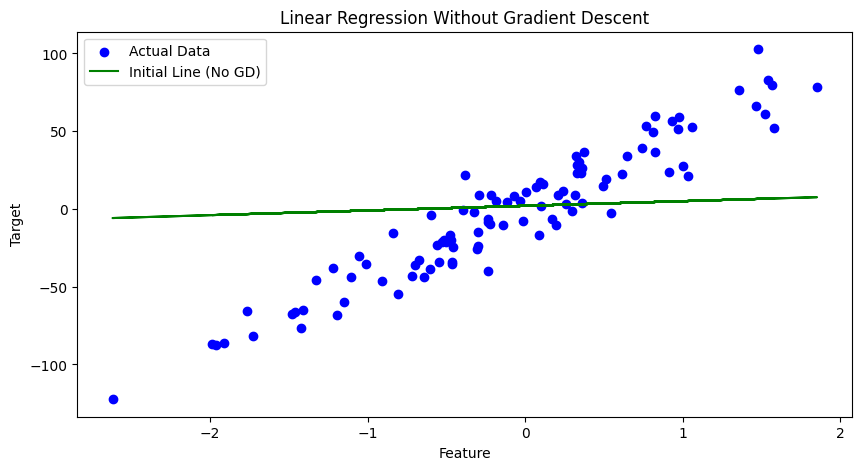

In [1]:
# Implementation of Gradient Descent in Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
y = y.reshape(-1, 1)
m = X.shape[0]

X_b = np.c_[np.ones((m, 1)), X]

theta = np.array([[2.0], [3.0]])

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, X_b.dot(theta), color="green", label="Initial Line (No GD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Without Gradient Descent")
plt.legend()
plt.show()

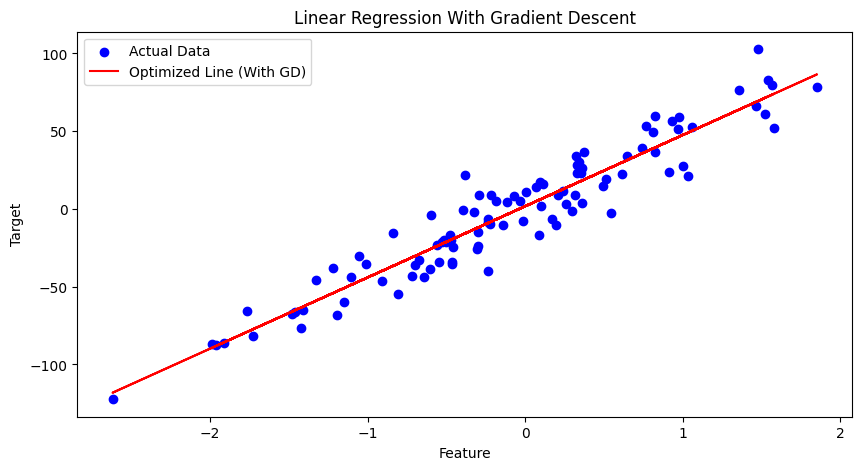

In [2]:
learning_rate = 0.1
n_iterations = 100

for _ in range(n_iterations):

    y_pred = X_b.dot(theta)

    gradients = (2 / m) * X_b.T.dot(y_pred - y)

    theta -= learning_rate * gradients

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, X_b.dot(theta), color="red", label="Optimized Line (With GD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression With Gradient Descent")
plt.legend()
plt.show()

Evaluation Metrics for Linear Regression

In [3]:
# 1. Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error

# Given values
Y_true = [1,1,2,2,4]  # Y_true = Y (original values)

# calculated values
Y_pred = [0.6,1.29,1.99,2.69,3.4]  # Y_pred = Y'

# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_true,Y_pred)


0.21606

In [6]:
# 2. Calculating MSE using NumPy
import numpy as np

# Given values
Y_true = [1,1,2,2,4]  # Y_true = Y (original values)

# Calculated values
Y_pred = [0.6,1.29,1.99,2.69,3.4]  # Y_pred = Y'

# Mean Squared Error
MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
print(MSE)

0.21606


2. Mean Absolute Error (MAE)

In [7]:
# Method 1: Manual Calculation of MAE
# consider a list of integers for actual
actual = [2, 3, 5, 5, 9]
# consider a list of integers for actual
calculated = [3, 3, 8, 7, 6]

n = 5
sum = 0
# for loop for iteration
for i in range(n):
    sum += abs(actual[i] - calculated[i])

error = sum/n
print("Mean absolute error : " + str(error))

Mean absolute error : 1.8


In [8]:
# Method 2: Calculating MAE Using sklearn.metrics
from sklearn.metrics import mean_absolute_error as mae

# list of integers of actual and calculated
actual = [2, 3, 5, 5, 9]
calculated = [3, 3, 8, 7, 6]

# calculate MAE
error = mae(actual, calculated)
print("Mean absolute error : " + str(error))

Mean absolute error : 1.8


Regularization Techniques for Linear Models

Slope (Coefficient): 1.9999999999999996
Intercept: 3.0000000000000018
MSE: 1.1832913578315177e-30
MAE: 7.401486830834377e-16
RMSE: 1.0877919644084146e-15
R² Score: 1.0


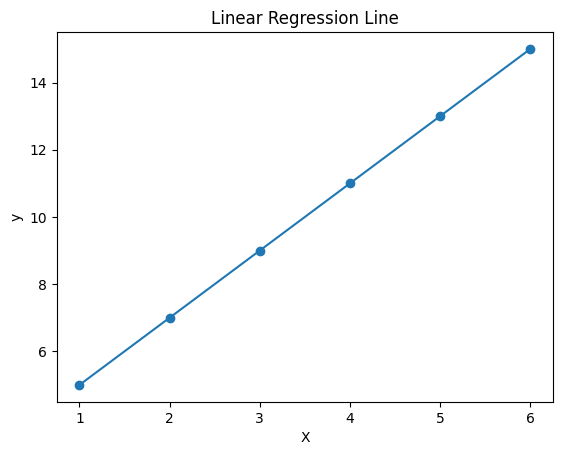

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# 1. Dataset
# -----------------------------
# X must be 2D for sklearn → reshape(-1, 1)
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([5, 7, 9, 11, 13, 15])   # Perfect linear: y = 2x + 3

# -----------------------------
# 2. Train the model
# -----------------------------
model = LinearRegression()
model.fit(X, y)

# -----------------------------
# 3. Predict
# -----------------------------
y_pred = model.predict(X)

# -----------------------------
# 4. Evaluation Metrics
# -----------------------------
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

# -----------------------------
# 5. Visualization
# -----------------------------
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Line")
plt.show()
